In [38]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## Discussion

In [7]:
0.975 ** 100

0.07951728986183142

## More Confidence Intervals and Sample Size

In [8]:
sf = Table.read_table('http://inferentialthinking.com/notebooks/san_francisco_2015.csv').select(3, 11, 21)
sf.set_format(2, NumberFormatter(0))
sf = sf.where(2, are.above(10000))
sf.show(3)

Organization Group,Job,Total Compensation
"Public Works, Transportation & Commerce",Water Qualitytech I/II,"117,767"
"Public Works, Transportation & Commerce",Soft Floor Coverer,"41,210"
Community Health,Health Care Billing Clerk 2,"110,561"


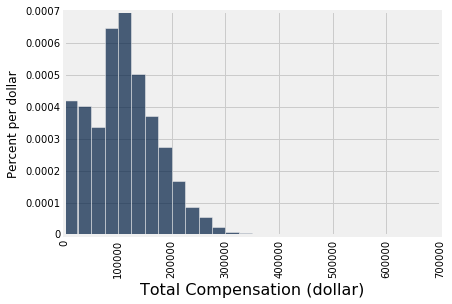

In [26]:
comp_bins = np.arange(0, 700000, 25000)
sf.hist(2, bins=comp_bins, unit='dollar')

In [9]:
def bootstrap_mean(sample_from_population, label, repetitions):
    resampled_means = []
    for i in np.arange(repetitions):
        resample = sample_from_population.sample()
        mean = np.mean(resample.column(label))
        resampled_means.append(mean)
    return resampled_means

def bootstrap_ci_mean(sample_from_population, label, repetitions):
    resampled_means = bootstrap_mean(sample_from_population, label, repetitions)
    
    interval_95 = make_array(
        percentile(2.5, resampled_means),
        percentile(97.5, resampled_means)
    )
    
    Table().with_column('Resampled mean', resampled_means).hist(0)
    plt.plot(interval_95, [0, 0], color='gold', lw=8)
    print('Approximate 95% Bootstrap Confidence Interval for Population Mean:')
    print(np.round(interval_95, 3))

In [10]:
sf_sample = sf.sample(200)
sf_sample.show(3)

Organization Group,Job,Total Compensation
"Public Works, Transportation & Commerce",Senior Account Clerk,"78,515"
"Public Works, Transportation & Commerce",Transit Power Line Worker,"130,181"
"Public Works, Transportation & Commerce",Pr Administrative Analyst,"156,770"


Approximate 95% Bootstrap Confidence Interval for Population Mean:
[ 105077.941  122609.638]


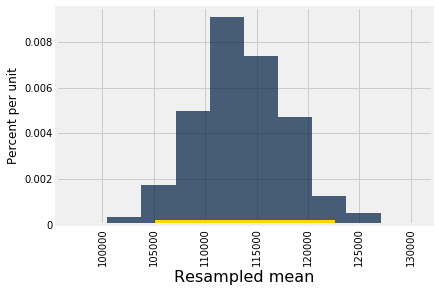

In [11]:
bootstrap_ci_mean(sf_sample, 'Total Compensation', 1000)

In [12]:
122609.638 - 105077.941

17531.697

Approximate 95% Bootstrap Confidence Interval for Population Mean:
[ 109165.612  117912.999]


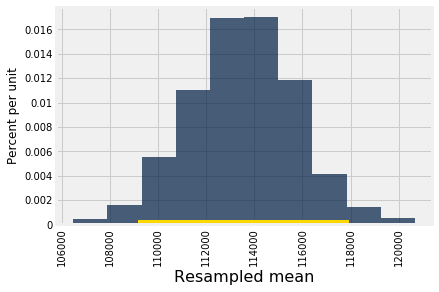

In [15]:
sf_sample = sf.sample(800)
bootstrap_ci_mean(sf_sample, 'Total Compensation', 1000)

In [14]:
113044.545 - 104834.732

8209.812999999995

## Experiment Design

In [19]:
votes = [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
np.std(votes)

0.5

In [26]:
total_voters=10

def sd_voters(n_voters_for_a):
    votes = np.append(np.ones(n_voters_for_a), np.zeros(total_voters - n_voters_for_a))
    print(votes)
    return np.std(votes)

sd_voters(6)

[ 1.  1.  1.  1.  1.  1.  0.  0.  0.  0.]


0.4898979485566356

In [43]:
_ = interact(sd_voters, n_voters_for_a=(0, 10))

In [27]:
worst_sd_pop = 0.5
width_in_sds = 4
desired_width = 0.03
(width_in_sds * (worst_sd_pop / desired_width)) ** 2

4444.444444444445

### Conducting the experiment

In [14]:
voters.labels

('Candidate', 'Chance')

In [6]:
voters.select(0)

Candidate
A
B


In [30]:
observed_sample = voters.select(0).sample(1000, weights=voters.column('Chance'))
observed_sample.show(3)

Candidate
B
A
A


In [35]:
n = 4445
observed_sample = voters.select(0).sample(n, weights=voters.column('Chance'))

means = []
for i in np.arange(1000):
    resample = observed_sample.sample()
    means.append(np.count_nonzero(resample.column(0) == 'A') / n)
print(percentile(2.5, means), percentile(97.5, means))

0.597525309336333 0.625421822272216


In [36]:
0.625421822272216 - 0.597525309336333

0.027896512935883022

In [37]:
voters

Candidate,Chance
A,0.6
B,0.4
